Importing Libraries

In [43]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

Loading and Displaying Data

In [44]:
titanic_test_data = 'C:\\Users\\ASUS\\Documents\\Titanic ML\\train.csv'

# Lire le fichier CSV
df = pd.read_csv(titanic_test_data)

# Afficher le tableau interactif
display(df)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Data Analysis

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8320\2066266380.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


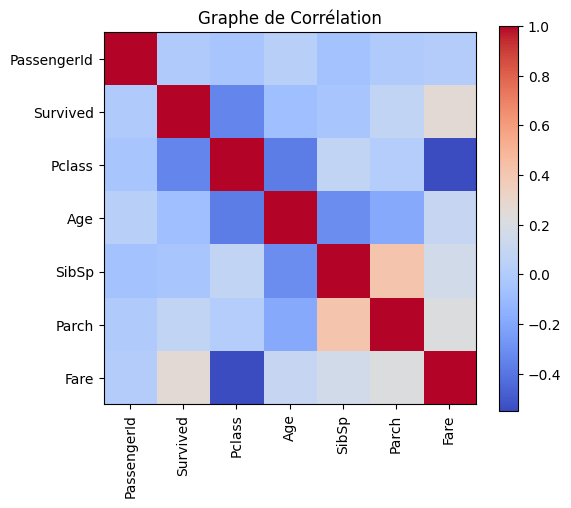

In [45]:
# Calculer la matrice de corrélation
corr_matrix = df.corr()

# Créer le graphe de corrélation en utilisant matplotlib
plt.figure(figsize=(6, 5))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Graphe de Corrélation')
plt.show()

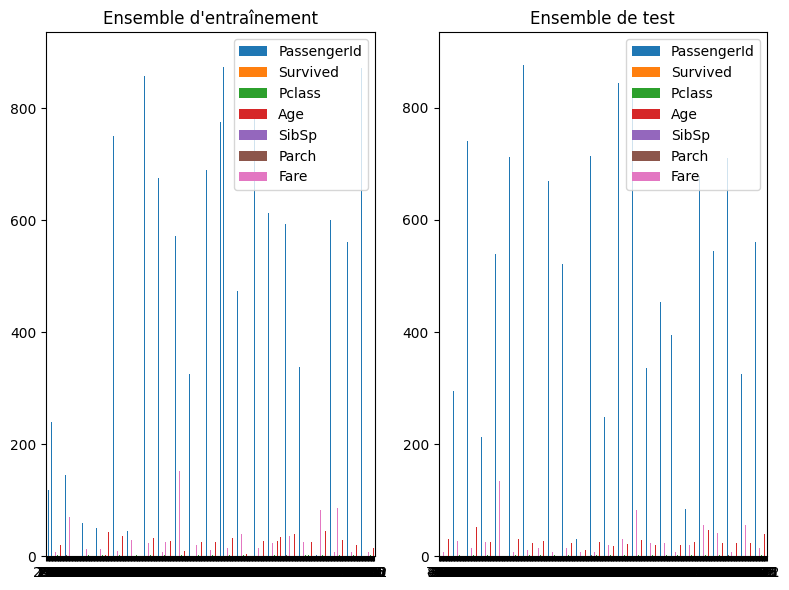

In [46]:
# Diviser le DataFrame en ensembles de train et de test (50% pour chaque ensemble)
train_df, test_df = train_test_split(df, test_size=0.5, random_state=42)

# Créer le graphe pour toutes les colonnes dans les ensembles de train et de test
plt.figure(figsize=(8, 6))

# Graphe pour l'ensemble de train
plt.subplot(1, 2, 1)
plt.title("Ensemble d'entraînement")
train_df.plot(kind='bar', ax=plt.gca())
plt.xticks(rotation=0)
plt.legend()

# Graphe pour l'ensemble de test
plt.subplot(1, 2, 2)
plt.title("Ensemble de test")
test_df.plot(kind='bar', ax=plt.gca())
plt.xticks(rotation=0)
plt.legend()

plt.tight_layout()
plt.show()

In [47]:
print("Information sur l'ensemble d'entrainment : ")
train_df.info()
print("*********************************************************************************")
print("Information sur l'ensemble test : ")
test_df.info()

Information sur l'ensemble d'entrainment : 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 445 entries, 236 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  445 non-null    int64  
 1   Survived     445 non-null    int64  
 2   Pclass       445 non-null    int64  
 3   Name         445 non-null    object 
 4   Sex          445 non-null    object 
 5   Age          358 non-null    float64
 6   SibSp        445 non-null    int64  
 7   Parch        445 non-null    int64  
 8   Ticket       445 non-null    object 
 9   Fare         445 non-null    float64
 10  Cabin        101 non-null    object 
 11  Embarked     445 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 45.2+ KB
*********************************************************************************
Information sur l'ensemble test : 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 709 to 711
Data co

Data Cleaning

In [48]:
# Imputation d'âge avec AgeImputer : Compléter les valeurs manquantes d'âge dans un ensemble de données
class AgeImputer (BaseEstimator, TransformerMixin):
    def fit(self, x, y = None):
        return self
    def transform(self, x):
        imputer = SimpleImputer(strategy="mean")
        x['Age'] = imputer.fit_transform(x[['Age']])
        return x
        

In [49]:
# "Encodage personnalisé avec CustomEncoder : Transformation des variables catégorielles en valeurs numériques encodées"
class CustomEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_encoded = X.copy()

        sex_mapping = {'male': 0, 'female': 1}
        embarked_mapping = {'C': 0, 'S': 1, 'Q': 2}
        
        X_encoded['Sex'] = X_encoded['Sex'].map(sex_mapping)
        X_encoded['Embarked'] = X_encoded['Embarked'].map(embarked_mapping)
        
        X_encoded['male_encoded'] = (X_encoded['Sex'] == 0).astype(int)
        X_encoded['female_encoded'] = (X_encoded['Sex'] == 1).astype(int)
        X_encoded['C_encoded'] = (X_encoded['Embarked'] == 0).astype(int)
        X_encoded['S_encoded'] = (X_encoded['Embarked'] == 1).astype(int)
        X_encoded['Q_encoded'] = (X_encoded['Embarked'] == 2).astype(int)
        
        return X_encoded

In [50]:
# "Élimination de colonnes avec ColumnRemover : Suppression sélective de colonnes dans un ensemble de données"
class ColumnRemover(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_remove=None):
        self.columns_to_remove = columns_to_remove
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_filtered = X.drop(["Name","Ticket","Embarked","Sex","Cabin"], axis=1, errors='ignore')
        return X_filtered

In [51]:
# "Mise à l'échelle des données avec DataScaler : Normalisation des caractéristiques numériques dans un ensemble de données"
class DataScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Séparer les caractéristiques (x) de la cible (y)
        x = X.drop(['Survived'], axis=1)
        y = X['Survived']

        # Initialiser le StandardScaler
        scaler = StandardScaler()

        # Appliquer le scaling sur les données (à l'exception de la colonne 'Survived')
        scaled_data = scaler.fit_transform(x)

        # Remettre les données échelonnées dans un DataFrame
        scaled_df = pd.DataFrame(scaled_data, columns=x.columns)

        # Ajouter la colonne 'Survived' à nouveau en utilisant y.to_numpy()
        scaled_df['Survived'] = y.to_numpy()

        return scaled_df

Pipeline 

In [52]:
# Créez une instance de votre pipeline
pipeline = Pipeline([
    ('age_imputer', AgeImputer()),         
    ('custom_encoder', CustomEncoder()),  
    ('column_remover', ColumnRemover()),
    ('data_scaler', DataScaler())   
])

# Utilisez le pipeline pour transformer vos données
train_df = pipeline.fit_transform(train_df)
test_df = pipeline.fit_transform(test_df)


In [53]:
display(train_df)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male_encoded,female_encoded,C_encoded,S_encoded,Q_encoded,Survived
0,-0.853639,-0.428546,1.157631,0.302883,-0.457604,-0.127256,0.709492,-0.709492,-0.446610,0.583405,-0.309934,0
1,-1.423412,-1.643215,-0.467340,1.843261,2.120039,4.052062,-1.409460,1.409460,-0.446610,0.583405,-0.309934,1
2,1.152117,-0.428546,-0.854239,-0.467306,-0.457604,-0.382952,0.709492,-0.709492,-0.446610,0.583405,-0.309934,0
3,-1.311768,-0.428546,-0.003063,0.302883,-0.457604,-0.215427,0.709492,-0.709492,-0.446610,0.583405,-0.309934,0
4,-1.280969,0.786123,-1.318516,0.302883,-0.457604,-0.387507,0.709492,-0.709492,2.239088,-1.714075,-0.309934,1
...,...,...,...,...,...,...,...,...,...,...,...,...
440,-1.354116,0.786123,-0.622100,-0.467306,-0.457604,-0.450844,-1.409460,1.409460,-0.446610,0.583405,-0.309934,1
441,-0.722745,-1.643215,0.000000,-0.467306,-0.457604,-0.039084,0.709492,-0.709492,-0.446610,0.583405,-0.309934,0
442,1.548648,0.786123,0.925493,1.073072,-0.457604,-0.336957,0.709492,-0.709492,-0.446610,0.583405,-0.309934,0
443,-0.087525,-1.643215,-1.163757,0.302883,2.120039,1.530364,-1.409460,1.409460,-0.446610,0.583405,-0.309934,1


Model Building

In [54]:
# Diviser les données en caractéristiques (X) et cible (y)
X_train = train_df.drop(['Survived'], axis=1)
y_train = train_df['Survived']
# Initialiser le modèle RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=42)

# Évaluer le modèle en utilisant la validation croisée
scores = cross_val_score(random_forest_model, X_train, y_train, cv=5, scoring='accuracy')
avg_score = scores.mean()

print(f"RandomForestClassifier: Mean accuracy = {avg_score:.4f}")

RandomForestClassifier: Mean accuracy = 0.8157


In [55]:
# Diviser les données de test en caractéristiques (X_test) et cible (y_test)
X_test = test_df.drop(['Survived'], axis=1)
y_test = test_df['Survived']

# Entraîner le modèle sur toutes les données d'entraînement
random_forest_model.fit(X_train, y_train)

# Faire des prédictions sur les données de test
predictions = random_forest_model.predict(X_test)

# Calculer l'exactitude des prédictions par rapport aux vraies étiquettes
accuracy = accuracy_score(y_test, predictions)

print(f"Exactitude sur les données de test : {accuracy:.4f}")

Exactitude sur les données de test : 0.8004


Building a Model with Actual Data

In [56]:
titanic_test_data = 'C:\\Users\\ASUS\\Documents\\Titanic ML\\test.csv'

# Lire le fichier CSV
titanic = pd.read_csv(titanic_test_data)
display(titanic)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [57]:
# Créez une instance de votre pipeline
pipeline2 = Pipeline([
    ('age_imputer', AgeImputer()),         
    ('custom_encoder', CustomEncoder()),  
    ('column_remover', ColumnRemover()),  
])

# Utilisez le pipeline pour transformer vos données
titanic = pipeline2.fit_transform(titanic)


In [58]:
titanic= titanic.fillna(method='ffill')
# Sélectionner uniquement les colonnes numériques pour le scaling
numeric_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Créer un objet StandardScaler
scaler = StandardScaler()

# Effectuer la mise à l'échelle uniquement sur les colonnes numériques
titanic[numeric_columns] = scaler.fit_transform(titanic[numeric_columns])
display(titanic)


,PassengerId,Pclass,Age,SibSp,Parch,Fare,male_encoded,female_encoded,C_encoded,S_encoded,Q_encoded
0,892,0.873482,0.334993,-0.499470,-0.400248,-0.497071,1,0,0,0,1
1,893,0.873482,1.325530,0.616992,-0.400248,-0.511934,0,1,0,1,0
2,894,-0.315819,2.514175,-0.499470,-0.400248,-0.463762,1,0,0,0,1
3,895,0.873482,-0.259330,-0.499470,-0.400248,-0.482135,1,0,0,1,0
4,896,0.873482,-0.655545,0.616992,0.619896,-0.417159,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0.873482,0.000000,-0.499470,-0.400248,-0.493113,1,0,0,1,0
414,1306,-1.505120,0.691586,-0.499470,-0.400248,1.314555,0,1,1,0,0
415,1307,0.873482,0.651965,-0.499470,-0.400248,-0.507453,1,0,0,1,0
416,1308,0.873482,0.000000,-0.499470,-0.400248,-0.493113,1,0,0,1,0


Predictions

In [60]:
prediction = random_forest_model.predict(titanic)
# Créer un DataFrame pour les prédictions
predictions_df = pd.DataFrame({'PassengerId': titanic['PassengerId'], 'Survived': prediction})
# Enregistrer les prédictions dans un fichier CSV
predictions_df.to_csv('predictions.csv', index=False)  # Vous pouvez choisir un nom de fichier approprié
display(predictions_df)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
